In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

#from keras.datasets import mnist
from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import model_from_json


import skimage.io as io 
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import os 

In [154]:
batch_size = 64
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# input image dimensions
img_channels = 3               # RGB
img_rows, img_cols = 158, 164  # this is big already 
input_shape = (3, img_rows, img_cols)

In [155]:
# the data, shuffled and split between train and test sets
path_class_0 = './data/class_0/'
path_class_1 = './data/class_1/'

nb_classes = 2
#input_shape = (1, img_rows, img_cols)

class0_files = [f for f in listdir(path_class_0) if isfile(join(path_class_0, f))]
class1_files = [f for f in listdir(path_class_1) if isfile(join(path_class_1, f))]

X_t = []
Y_t = []

for fn in class0_files[:1000]:
    img = io.imread(os.path.join(path_class_0, fn))
    img = img.transpose((2,0,1))
    img = img[:3, :, :]
    X_t.append(img)
    Y_t.append(0)

for fn in class1_files[:500]:
    img = io.imread(os.path.join(path_class_1, fn))
    img = img.transpose((2,0,1))
    img = img[:3, :, :]
    X_t.append(img)
    Y_t.append(1)


X_t = np.asarray(X_t)
Y_t = np.asarray(Y_t)
X_t = X_t.astype('float32')
X_t /= 255

Y_t = np_utils.to_categorical(Y_t, nb_classes)

In [127]:
Y_t

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [111]:
# seems to break
permutation = np.random.permutation(142)

X_t = X_t[permutation]
Y_t = Y_t[permutation]

In [109]:
""" 

def train_model(model, X_train, Y_train, X_test, Y_test):
    nb_epoch = 1
    batch_size = 16
    optimizer='adadelta' 
    
    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
 
    model.fit(X_train, Y_train, nb_epoch=nb_epoch, 
              batch_size=batch_size,
              #validation_split=0.1, 
              show_accuracy=True, 
              verbose=1)
 
    #print('Testing...')
    #res = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1, show_accuracy=True)
    #print('Test accuracy: {0}'.format(res[1]))
    
""" 

" \n\ndef train_model(model, X_train, Y_train, X_test, Y_test):\n    nb_epoch = 1\n    batch_size = 16\n    optimizer='adadelta' \n    \n    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)\n    model.compile(loss='categorical_crossentropy', optimizer=optimizer)\n \n    model.fit(X_train, Y_train, nb_epoch=nb_epoch, \n              batch_size=batch_size,\n              #validation_split=0.1, \n              show_accuracy=True, \n              verbose=1)\n \n    #print('Testing...')\n    #res = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1, show_accuracy=True)\n    #print('Test accuracy: {0}'.format(res[1]))\n    \n"

In [156]:
X_t.shape

(1500, 3, 158, 164)

In [157]:
def make_model():
    model = Sequential()

    model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                            border_mode='valid',
                            input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    """
    model.add(Convolution2D(nb_filters, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    """

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))


    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model 

In [158]:
def save_model(model):
    model_json = model.to_json()
    open('ahem_architecture.json', 'w').write(model_json)
    model.save_weights('ahem_weights.h5', overwrite=True)
    

def load_model(model_def_fname, model_weight_fname):
    model = model_from_json(open(model_def_fname).read())
    model.load_weights(model_weight_fname)
    return model

def load_image(filename):
    img = io.imread(filename)
    img = img.transpose((2,0,1))
    img = img[:3, :, :]
    return img

In [159]:
model = make_model()

In [ ]:
for e in xrange(3):
    # if load existing model, compile before fitting
    #model = load_model('ahem_architecture.json', 'ahem_weights.h5')
    #model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    
    model.fit(X_t, Y_t, batch_size=batch_size, nb_epoch=1, verbose=1)
    save_model(model)

Epoch 1/1
 128/1500 [=>............................] - ETA: 1006s - loss: 3.4802 - acc: 0.5234

In [153]:
if __name__ == '__main__':
    new_stuff = []
    img = load_image('./data/class_1/partial_spectrum_12299.png')
    new_stuff.append(img)
    img = load_image('./data/class_1/partial_spectrum_9649.png')
    new_stuff.append(img)
    img = load_image('./data/class_0/partial_spectrum_34111.png')
    new_stuff.append(img)
    img = load_image('./data/class_0/partial_spectrum_44148.png')
    new_stuff.append(img)
    img = load_image('./data/class_0/partial_spectrum_31938.png')
    new_stuff.append(img)
    img = load_image('./data/class_1/partial_spectrum_12000.png')
    new_stuff.append(img)
    
    new_stuff = np.asarray(new_stuff)
    model = load_model('ahem_architecture.json', 'ahem_weights.h5')
    print('I know it should be class 0 and it is...')
    predictions = model.predict_classes(new_stuff)
    print('class %s' %predictions)

I know it should be class 0 and it is...
6/6 [==============================] - 1s
class [0 0 1 1 1 0]


In [98]:
predictions

array([0])

In [5]:
# Load sound files
path = './data'
sound_file_paths = [os.path.join(path, "close_voice.wav"),
                    os.path.join(path,"jingle.wav"),
                    os.path.join(path,"jingle_end.wav"),
                    os.path.join(path, "ahem_sounds.wav")]

sound_names = ["close_voice","jingle","jingle_end", "ahem_sounds"]

raw_sounds = ut.load_sound_files(sound_file_paths)

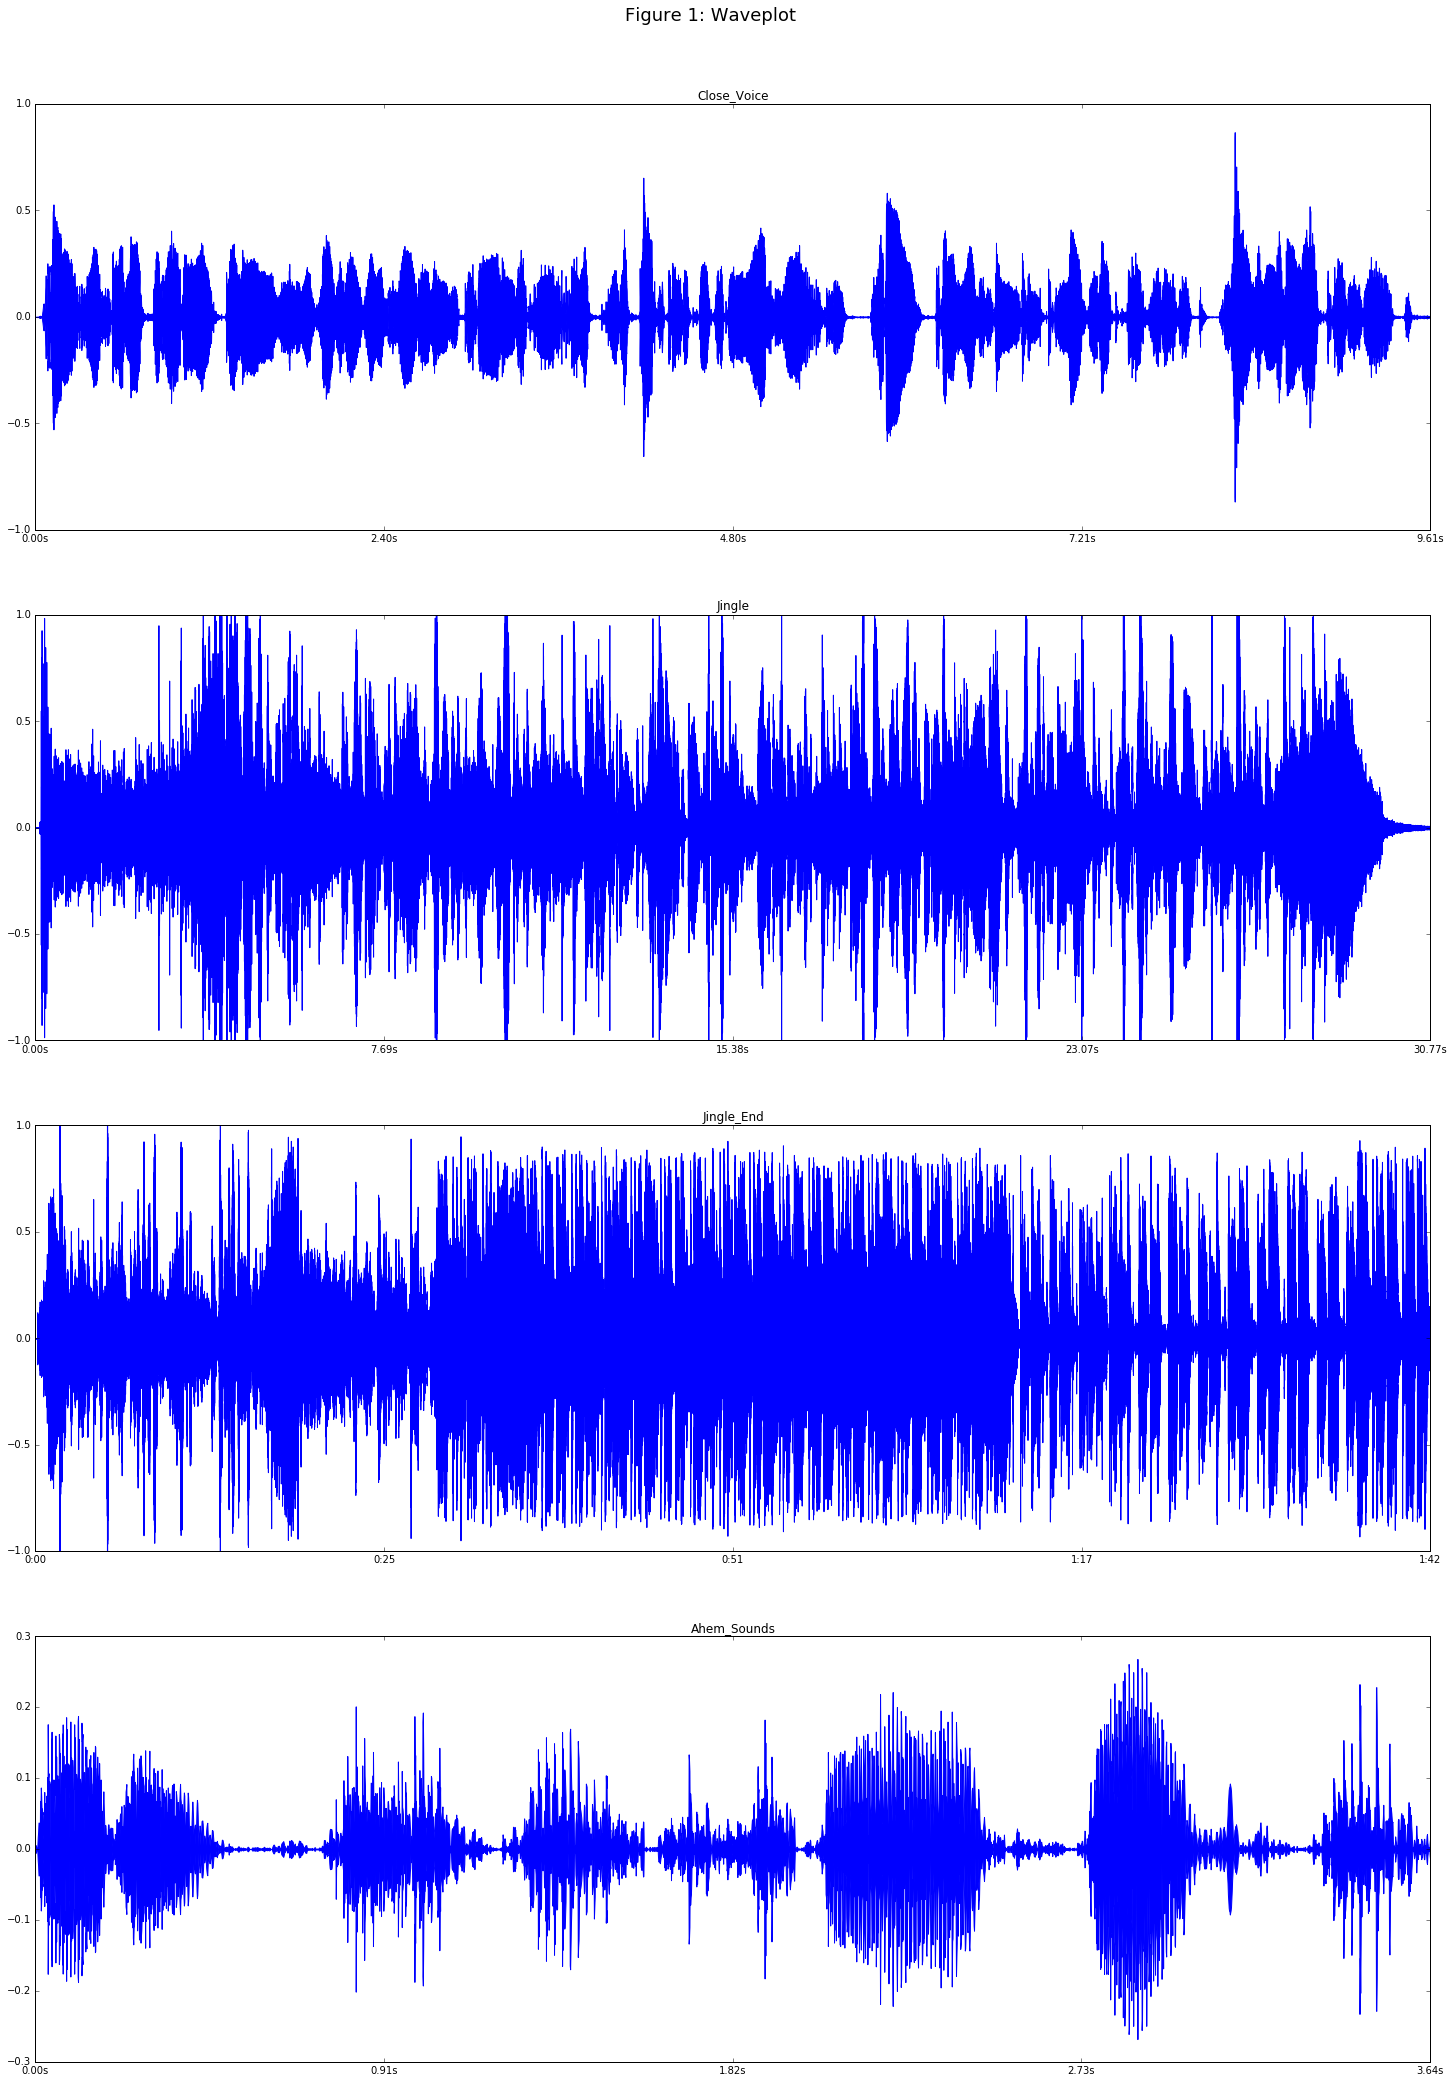

In [21]:
ut.plot_waves(sound_names,raw_sounds)

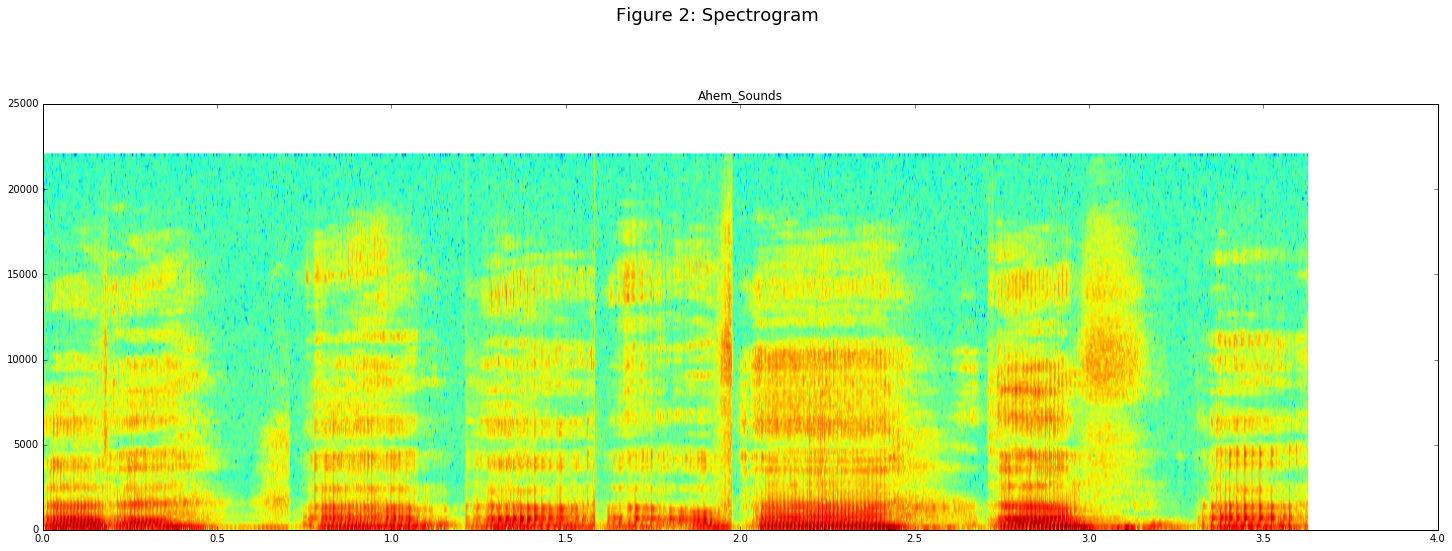

In [42]:
plot_specgram(list(sound_names[3:]), list(raw_sounds[3:]))

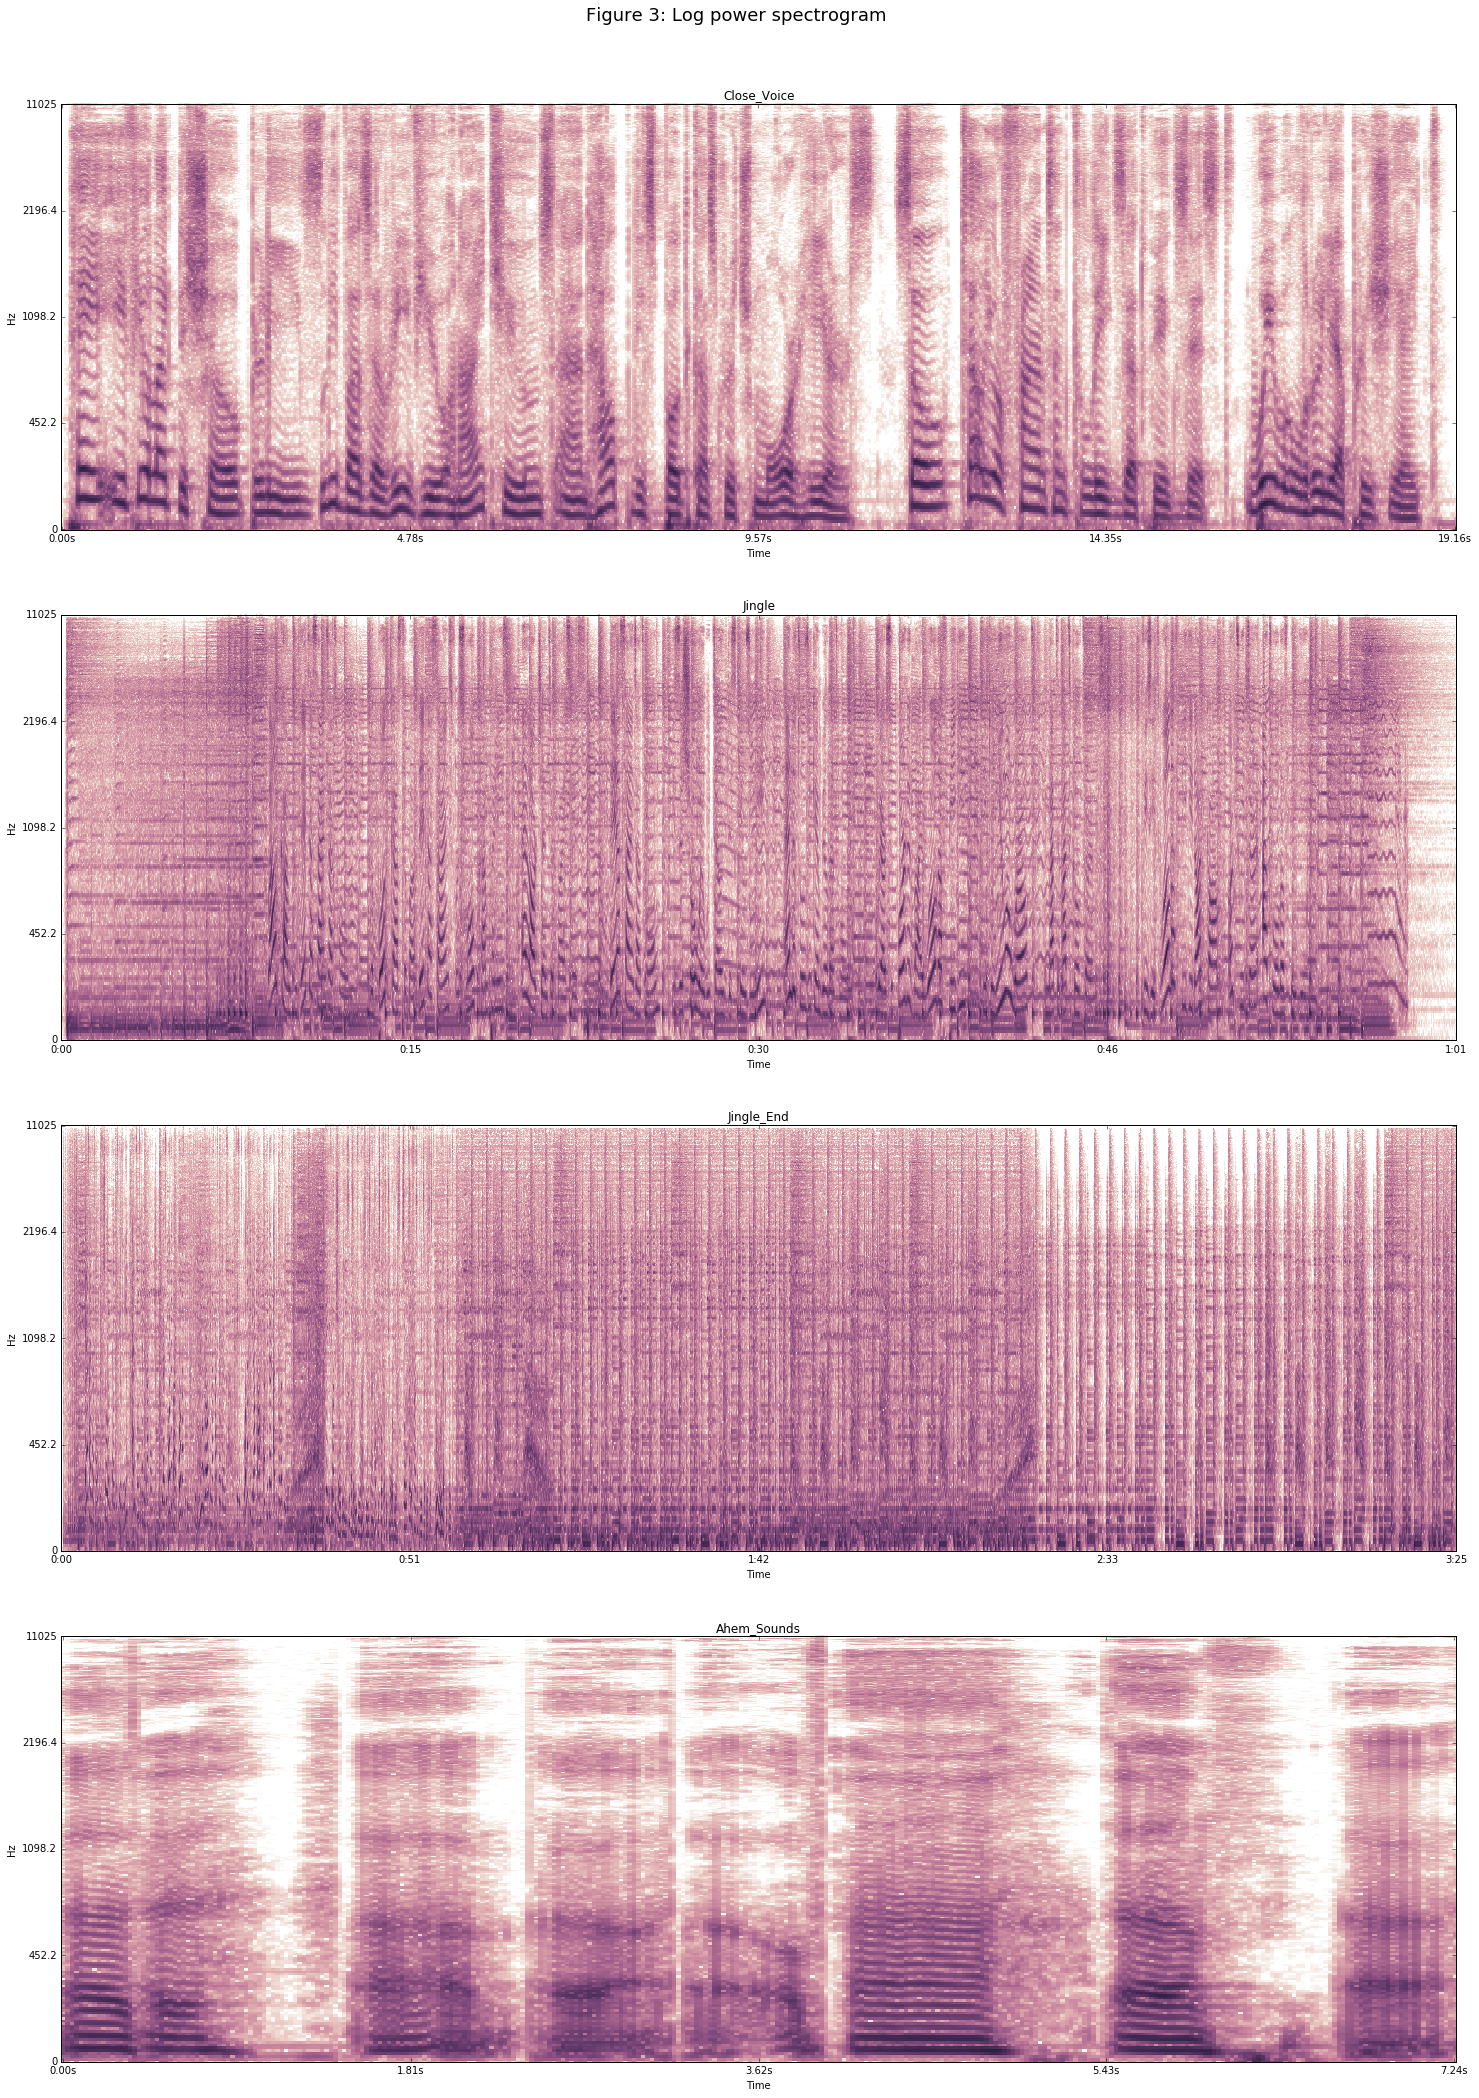

In [23]:
plot_log_power_specgram(sound_names,raw_sounds)

In [8]:
 mfccs, chroma, mel, contrast,tonnetz = extract_feature('./data/jingle.wav')

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)


In [10]:
mfccs.shape

(40,)

In [12]:
chroma.shape

(12,)

In [14]:
mel.shape

(128,)

In [16]:
contrast.shape

(7,)

In [18]:
tonnetz.shape

(6,)

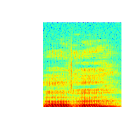

In [26]:
ut.specgram_frombuffer(raw_sounds[3][0:22050], 5, 2, show=True)

## Playback and clean new samples

In [15]:
import librosa
import librosa.display
import IPython.display
import numpy as np

import numpy as np
from skimage.measure import block_reduce
import skimage.io as io 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# Load the example track
#y, sr = librosa.load(librosa.util.example_audio_file())

# Play it back!
IPython.display.Audio(data=raw_sounds[3], rate=44100)

In [23]:
clean_samples = np.concatenate((raw_sounds[3][0:50000], raw_sounds[3][100000:] ))

In [25]:
IPython.display.Audio(data=clean_samples, rate=44100)